# Program description of machine learning modeling (CNN-regression)

## Overview:
This module is responsible for building a Convolutional Neural Network (CNN) model for regression tasks. It reads the normalized dataset output by **Module 9**, trains the CNN model, and saves the best-performing model. This module is designed to work in parallel with other network models, such as MLP, for comparison purposes.

## Key Steps:
1. **Dataset Input**:
   - The normalized training and validation datasets (features and labels) generated by **Module 9** are used as input for the CNN model.
   
2. **CNN Model Construction**:
   - A Convolutional Neural Network (CNN) is built to perform regression, meaning the model will output continuous values based on the input features.

3. **Training and Model Selection**:
   - The model is trained using the training dataset, and the best model is saved after training based on performance metrics such as accuracy or loss.
   
4. **Prediction**:
   - After training, the CNN model is used to predict values on the test set, and its performance is evaluated.
   
5. **Output**:
   - The trained model is saved under the `datasets-ml` folder in the current directory.
   - Each run saves the model file with a timestamp, e.g., `MLPmodel--{current_time}`.

## Input:
- The dataset is read from the output of **Module 9** (normalized data set).
- The files containing the training and validation data include both feature and label files.

## Output:
- The best-trained CNN model is saved in the `datasets-ml` folder.
- The model filename contains a timestamp indicating the time of training.


contacts：zhaohf@ihep.ac.cn

#  Import libraries

In [1]:
import logging
from tensorflow.keras import layers, models, regularizers
#from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import joblib
import sys
import keras.callbacks

2025-01-21 10:03:07.094482: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


##  Version Information

In [2]:
def get_python_version():
    return sys.version
def get_package_version(package_name):
    try:
        module = __import__(package_name)
        version = getattr(module, '__version__', None)
        if version:
            return version
        else:
            return pkg_resources.get_distribution(package_name).version
    except (ImportError, AttributeError, pkg_resources.DistributionNotFound):
        return "Version info not found"

packages = ['tensorflow', 'numpy', 'joblib', 'matplotlib','sklearn']
for package in packages:
    print(f"{package}: {get_package_version(package)}")
print(f"Python: {get_python_version()}")

tensorflow: 2.9.1
numpy: 1.23.5
joblib: 1.4.0
matplotlib: 3.7.5
sklearn: 1.3.2
Python: 3.8.15 | packaged by conda-forge | (default, Nov 22 2022, 08:46:39) 
[GCC 10.4.0]


# Parameter settings (input file, output file)

## Input File Path:
- `dir_data`: Specifies the directory where the normalized dataset is located.
- The dataset includes **training**, **validation**, and **test** datasets (features and labels) generated in **Module 9**.
- Example: `'0926-datasets-2/datasets(JmolNN)-pre-xmu-cn'` (path where normalized data is stored).

## Output File Path:
- `output_path`: Specifies the directory where the CNN model will be saved after training.
- The trained model will be stored under the `datasets-ml` folder in the current working path.
- Example: `'0926-datasets-ml/ml-cn-xmu-(JmolNN)'` (path where the model will be saved).

## Model Output Filename:
- `current_time`: Timestamp is used to create a unique filename for each model.
- The model filename will follow the pattern: `CNNmodel-{current_time}`.
- Example: `'CNNmodel-20230101_1200'` (timestamp format `YYYYMMDD_HHMM`).

## Log File:
- `log_file_path`: Path where the training log file will be stored, including details of training, dataset sizes, and any relevant logs.
- Example: `'training_log.txt'`.

## Data Files:
- Training, validation, and test feature and label files are loaded from the datastest_JmolNN.txt`: Test labels


In [3]:
# Set input file path
dir_data = '0926-datasets/datasets(JmolNN)-pre-xmu-cn'
# Set output file save path
output_path = '0926-datasets-ml/ml-cn-xmu-(JmolNN)'
# Output save file name and add timestamp
current_time = datetime.now().strftime("%Y%m%d_%H%M")
dir_output=os.path.join(output_path,f'CNNmodel-{current_time}')
# Check if the input path exists
if os.path.exists(dir_data):
    print(f"File '{dir_data}' exists.")
else:
    raise FileNotFoundError(f"File '{dir_data}' does not exist.")
# Load training, validation, and test datasets
os.makedirs(dir_output, exist_ok=True)
file_train_feature = os.path.join(dir_data, 'xmu_train_JmolNN.txt')
file_train_label = os.path.join(dir_data, 'label_cn_train_JmolNN.txt')
file_valid_feature = os.path.join(dir_data, 'xmu_valid_JmolNN.txt')
file_valid_label = os.path.join(dir_data, 'label_cn_valid_JmolNN.txt')
file_test_feature = os.path.join(dir_data, 'xmu_test_JmolNN.txt')
file_test_label = os.path.join(dir_data, 'label_cn_test_JmolNN.txt')
# Set log file
log_file_path = os.path.join(dir_output, 'training_log.txt')
logging.basicConfig(level=logging.INFO, format='%(message)s', handlers=[logging.FileHandler(log_file_path), logging.StreamHandler()])
# Read data
X_train = np.loadtxt(file_train_feature)
y_train = np.loadtxt(file_train_label, dtype=float)
X_valid = np.loadtxt(file_valid_feature)
y_valid = np.loadtxt(file_valid_label, dtype=float)
X_test = np.loadtxt(file_test_feature)
y_test = np.loadtxt(file_test_label, dtype=float)
# Prepare messages for dataset sizes
train_size_message = f"Training set size: X_train: {X_train.shape}, y_train: {y_train.shape}"
valid_size_message = f"Validation set size: X_valid: {X_valid.shape}, y_valid: {y_valid.shape}"
test_size_message = f"Test set size: X_test: {X_test.shape}, y_test: {y_test.shape}"
print(train_size_message)
print(valid_size_message)
print(test_size_message)
# Log dataset sizes
logging.info(train_size_message)
logging.info(valid_size_message)
logging.info(test_size_message)

File '0926-datasets/datasets(JmolNN)-pre-xmu-cn' exists.


Training set size: X_train: (3465, 1000), y_train: (3465,)
Validation set size: X_valid: (990, 1000), y_valid: (990,)
Test set size: X_test: (495, 1000), y_test: (495,)


Training set size: X_train: (3465, 1000), y_train: (3465,)
Validation set size: X_valid: (990, 1000), y_valid: (990,)
Test set size: X_test: (495, 1000), y_test: (495,)


# Build a CNN regression model and save the best model results

In [4]:
# Reshape the input data to (number of samples, number of features, 1, 1) to adapt to the CNN input format
X_train = X_train.reshape(-1, X_train.shape[1], 1)
X_valid = X_valid.reshape(-1, X_valid.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1)
# Build 1D CNN model
model = models.Sequential([
    layers.Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Conv1D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    #layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.2),
    layers.Dense(1)
])

# Compile the model
#model.compile(optimizer='adam', 
              #loss='mse', 
             # metrics=['mae'])
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer='adam',
             loss='mse',  
              metrics=['mae', 'mse'])
# Print model structure
model.summary()
# Redirect the output of model.summary() to a file
model_summary_path = os.path.join(dir_output, 'model_summary.txt')

# Use context manager to open a file and write the model summary
with open(model_summary_path, 'w') as f:
    # Redirect standard output to the file
    model.summary(print_fn=lambda x: f.write(x + '\n'))

print(f"Model summary saved to: {model_summary_path}")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 998, 32)           128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 499, 32)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 497, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 248, 64)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 246, 128)          24704     
                                                                 
 flatten (Flatten)           (None, 31488)             0

2025-01-21 10:03:12.663872: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model summary saved to: 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250121_1003/model_summary.txt


In [5]:

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor validation loss
                               patience=20,         # Stop if no improvement for 20 epochs
                               restore_best_weights=True,  # Restore the best weights
                               min_delta=0.001,     # Minimum change to qualify as improvement
                               mode='min')          # Minimize validation loss

# Optionally, define ModelCheckpoint to save the best model during training
model_checkpoint = ModelCheckpoint(os.path.join(dir_output, 'best_model.h5'), 
                                   monitor='val_loss', 
                                   save_best_only=True, 
                                   mode='min')

class CustomCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        log_message = (f"Epoch {epoch + 1}, "
                       f"Loss: {logs['loss']:.4f}, "
                       f"Val_Loss: {logs['val_loss']:.4f}, ")
        logging.info(log_message)

# Train the model with EarlyStopping and ModelCheckpoint
history = model.fit(X_train, y_train, 
                    epochs=150, 
                    batch_size=32, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[early_stopping, model_checkpoint, CustomCallback()],
                    verbose=1)

# Save the best model (if not already handled by ModelCheckpoint)
#model_path = os.path.join(dir_output, 'best_model.h5')
#model.save(model_path)
#print(f"Best model saved to: {model_path}")

# Evaluate model performance
loss, mae, mse = model.evaluate(X_test, y_test)
print(f'Test Mean Absolute Error: {mae}')
print(f'Test Mean Squared Error: {mse}')


Epoch 1/150
109/109 [==============================] - ETA: 0s - loss: 3.1212 - mae: 1.1510 - mse: 3.1212

Epoch 1, Loss: 3.1212, Val_Loss: 0.8370, 


109/109 [==============================] - 5s 36ms/step - loss: 3.1212 - mae: 1.1510 - mse: 3.1212 - val_loss: 0.8370 - val_mae: 0.7155 - val_mse: 0.8370
Epoch 2/150
107/109 [============================>.] - ETA: 0s - loss: 0.9873 - mae: 0.7671 - mse: 0.9873

Epoch 2, Loss: 0.9854, Val_Loss: 0.7266, 


109/109 [==============================] - 4s 33ms/step - loss: 0.9854 - mae: 0.7659 - mse: 0.9854 - val_loss: 0.7266 - val_mae: 0.6820 - val_mse: 0.7266
Epoch 3/150
107/109 [============================>.] - ETA: 0s - loss: 0.7730 - mae: 0.6815 - mse: 0.7730

Epoch 3, Loss: 0.7711, Val_Loss: 0.8341, 


109/109 [==============================] - 3s 30ms/step - loss: 0.7711 - mae: 0.6808 - mse: 0.7711 - val_loss: 0.8341 - val_mae: 0.7230 - val_mse: 0.8341
Epoch 4/150
108/109 [============================>.] - ETA: 0s - loss: 0.7849 - mae: 0.6860 - mse: 0.7849

Epoch 4, Loss: 0.7861, Val_Loss: 0.6647, 


109/109 [==============================] - 4s 33ms/step - loss: 0.7861 - mae: 0.6863 - mse: 0.7861 - val_loss: 0.6647 - val_mae: 0.6599 - val_mse: 0.6647
Epoch 5/150
108/109 [============================>.] - ETA: 0s - loss: 0.6852 - mae: 0.6432 - mse: 0.6852

Epoch 5, Loss: 0.6844, Val_Loss: 0.8619, 


109/109 [==============================] - 3s 31ms/step - loss: 0.6844 - mae: 0.6430 - mse: 0.6844 - val_loss: 0.8619 - val_mae: 0.7287 - val_mse: 0.8619
Epoch 6/150
109/109 [==============================] - ETA: 0s - loss: 0.5899 - mae: 0.5996 - mse: 0.5899

Epoch 6, Loss: 0.5899, Val_Loss: 0.6269, 


109/109 [==============================] - 4s 34ms/step - loss: 0.5899 - mae: 0.5996 - mse: 0.5899 - val_loss: 0.6269 - val_mae: 0.6230 - val_mse: 0.6269
Epoch 7/150
109/109 [==============================] - ETA: 0s - loss: 0.5298 - mae: 0.5594 - mse: 0.5298

Epoch 7, Loss: 0.5298, Val_Loss: 0.5662, 


109/109 [==============================] - 4s 34ms/step - loss: 0.5298 - mae: 0.5594 - mse: 0.5298 - val_loss: 0.5662 - val_mae: 0.5895 - val_mse: 0.5662
Epoch 8/150
108/109 [============================>.] - ETA: 0s - loss: 0.6041 - mae: 0.5890 - mse: 0.6041

Epoch 8, Loss: 0.6040, Val_Loss: 0.6597, 


109/109 [==============================] - 3s 31ms/step - loss: 0.6040 - mae: 0.5889 - mse: 0.6040 - val_loss: 0.6597 - val_mae: 0.6229 - val_mse: 0.6597
Epoch 9/150
109/109 [==============================] - ETA: 0s - loss: 0.5151 - mae: 0.5500 - mse: 0.5151

Epoch 9, Loss: 0.5151, Val_Loss: 0.6016, 


109/109 [==============================] - 3s 31ms/step - loss: 0.5151 - mae: 0.5500 - mse: 0.5151 - val_loss: 0.6016 - val_mae: 0.5658 - val_mse: 0.6016
Epoch 10/150
108/109 [============================>.] - ETA: 0s - loss: 0.5106 - mae: 0.5463 - mse: 0.5106

Epoch 10, Loss: 0.5108, Val_Loss: 0.5872, 


109/109 [==============================] - 3s 31ms/step - loss: 0.5108 - mae: 0.5464 - mse: 0.5108 - val_loss: 0.5872 - val_mae: 0.5530 - val_mse: 0.5872
Epoch 11/150
108/109 [============================>.] - ETA: 0s - loss: 0.5213 - mae: 0.5458 - mse: 0.5213

Epoch 11, Loss: 0.5214, Val_Loss: 0.6503, 


109/109 [==============================] - 3s 31ms/step - loss: 0.5214 - mae: 0.5460 - mse: 0.5214 - val_loss: 0.6503 - val_mae: 0.5766 - val_mse: 0.6503
Epoch 12/150
108/109 [============================>.] - ETA: 0s - loss: 0.5495 - mae: 0.5693 - mse: 0.5495

Epoch 12, Loss: 0.5491, Val_Loss: 0.4825, 


109/109 [==============================] - 4s 34ms/step - loss: 0.5491 - mae: 0.5692 - mse: 0.5491 - val_loss: 0.4825 - val_mae: 0.5157 - val_mse: 0.4825
Epoch 13/150
108/109 [============================>.] - ETA: 0s - loss: 0.5075 - mae: 0.5398 - mse: 0.5075

Epoch 13, Loss: 0.5080, Val_Loss: 0.6483, 


109/109 [==============================] - 3s 30ms/step - loss: 0.5080 - mae: 0.5403 - mse: 0.5080 - val_loss: 0.6483 - val_mae: 0.6022 - val_mse: 0.6483
Epoch 14/150
107/109 [============================>.] - ETA: 0s - loss: 0.5226 - mae: 0.5459 - mse: 0.5226

Epoch 14, Loss: 0.5196, Val_Loss: 0.5278, 


109/109 [==============================] - 3s 29ms/step - loss: 0.5196 - mae: 0.5446 - mse: 0.5196 - val_loss: 0.5278 - val_mae: 0.5433 - val_mse: 0.5278
Epoch 15/150
109/109 [==============================] - ETA: 0s - loss: 0.4346 - mae: 0.5037 - mse: 0.4346

Epoch 15, Loss: 0.4346, Val_Loss: 0.5759, 


109/109 [==============================] - 3s 26ms/step - loss: 0.4346 - mae: 0.5037 - mse: 0.4346 - val_loss: 0.5759 - val_mae: 0.5670 - val_mse: 0.5759
Epoch 16/150
108/109 [============================>.] - ETA: 0s - loss: 0.4609 - mae: 0.5124 - mse: 0.4609

Epoch 16, Loss: 0.4603, Val_Loss: 0.5112, 


109/109 [==============================] - 3s 25ms/step - loss: 0.4603 - mae: 0.5121 - mse: 0.4603 - val_loss: 0.5112 - val_mae: 0.5218 - val_mse: 0.5112
Epoch 17/150
107/109 [============================>.] - ETA: 0s - loss: 0.4172 - mae: 0.4906 - mse: 0.4172

Epoch 17, Loss: 0.4167, Val_Loss: 0.4383, 


109/109 [==============================] - 3s 28ms/step - loss: 0.4167 - mae: 0.4904 - mse: 0.4167 - val_loss: 0.4383 - val_mae: 0.4887 - val_mse: 0.4383
Epoch 18/150
108/109 [============================>.] - ETA: 0s - loss: 0.4009 - mae: 0.4775 - mse: 0.4009

Epoch 18, Loss: 0.4007, Val_Loss: 0.4733, 


109/109 [==============================] - 3s 26ms/step - loss: 0.4007 - mae: 0.4775 - mse: 0.4007 - val_loss: 0.4733 - val_mae: 0.5096 - val_mse: 0.4733
Epoch 19/150
108/109 [============================>.] - ETA: 0s - loss: 0.4600 - mae: 0.5131 - mse: 0.4600

Epoch 19, Loss: 0.4598, Val_Loss: 0.5656, 


109/109 [==============================] - 3s 26ms/step - loss: 0.4598 - mae: 0.5128 - mse: 0.4598 - val_loss: 0.5656 - val_mae: 0.5374 - val_mse: 0.5656
Epoch 20/150
108/109 [============================>.] - ETA: 0s - loss: 0.4350 - mae: 0.5008 - mse: 0.4350

Epoch 20, Loss: 0.4354, Val_Loss: 0.5003, 


109/109 [==============================] - 3s 26ms/step - loss: 0.4354 - mae: 0.5012 - mse: 0.4354 - val_loss: 0.5003 - val_mae: 0.5315 - val_mse: 0.5003
Epoch 21/150
108/109 [============================>.] - ETA: 0s - loss: 0.4303 - mae: 0.4907 - mse: 0.4303

Epoch 21, Loss: 0.4308, Val_Loss: 0.4625, 


109/109 [==============================] - 3s 25ms/step - loss: 0.4308 - mae: 0.4910 - mse: 0.4308 - val_loss: 0.4625 - val_mae: 0.4984 - val_mse: 0.4625
Epoch 22/150
107/109 [============================>.] - ETA: 0s - loss: 0.4239 - mae: 0.4921 - mse: 0.4239

Epoch 22, Loss: 0.4223, Val_Loss: 0.4921, 


109/109 [==============================] - 3s 26ms/step - loss: 0.4223 - mae: 0.4914 - mse: 0.4223 - val_loss: 0.4921 - val_mae: 0.5206 - val_mse: 0.4921
Epoch 23/150
107/109 [============================>.] - ETA: 0s - loss: 0.3933 - mae: 0.4698 - mse: 0.3933

Epoch 23, Loss: 0.3915, Val_Loss: 0.5144, 


109/109 [==============================] - 3s 26ms/step - loss: 0.3915 - mae: 0.4692 - mse: 0.3915 - val_loss: 0.5144 - val_mae: 0.5183 - val_mse: 0.5144
Epoch 24/150
107/109 [============================>.] - ETA: 0s - loss: 0.4116 - mae: 0.4875 - mse: 0.4116

Epoch 24, Loss: 0.4115, Val_Loss: 0.4599, 


109/109 [==============================] - 3s 26ms/step - loss: 0.4115 - mae: 0.4871 - mse: 0.4115 - val_loss: 0.4599 - val_mae: 0.5092 - val_mse: 0.4599
Epoch 25/150
107/109 [============================>.] - ETA: 0s - loss: 0.3801 - mae: 0.4639 - mse: 0.3801

Epoch 25, Loss: 0.3816, Val_Loss: 0.4357, 


109/109 [==============================] - 3s 29ms/step - loss: 0.3816 - mae: 0.4646 - mse: 0.3816 - val_loss: 0.4357 - val_mae: 0.4861 - val_mse: 0.4357
Epoch 26/150
108/109 [============================>.] - ETA: 0s - loss: 0.4250 - mae: 0.4840 - mse: 0.4250

Epoch 26, Loss: 0.4258, Val_Loss: 0.4332, 


109/109 [==============================] - 3s 28ms/step - loss: 0.4258 - mae: 0.4844 - mse: 0.4258 - val_loss: 0.4332 - val_mae: 0.4860 - val_mse: 0.4332
Epoch 27/150
108/109 [============================>.] - ETA: 0s - loss: 0.3957 - mae: 0.4724 - mse: 0.3957

Epoch 27, Loss: 0.3952, Val_Loss: 0.4173, 


109/109 [==============================] - 3s 29ms/step - loss: 0.3952 - mae: 0.4722 - mse: 0.3952 - val_loss: 0.4173 - val_mae: 0.4755 - val_mse: 0.4173
Epoch 28/150
107/109 [============================>.] - ETA: 0s - loss: 0.3754 - mae: 0.4613 - mse: 0.3754

Epoch 28, Loss: 0.3729, Val_Loss: 0.4868, 


109/109 [==============================] - 3s 26ms/step - loss: 0.3729 - mae: 0.4596 - mse: 0.3729 - val_loss: 0.4868 - val_mae: 0.5304 - val_mse: 0.4868
Epoch 29/150
108/109 [============================>.] - ETA: 0s - loss: 0.4081 - mae: 0.4799 - mse: 0.4081

Epoch 29, Loss: 0.4082, Val_Loss: 0.4229, 


109/109 [==============================] - 3s 26ms/step - loss: 0.4082 - mae: 0.4800 - mse: 0.4082 - val_loss: 0.4229 - val_mae: 0.4760 - val_mse: 0.4229
Epoch 30/150
107/109 [============================>.] - ETA: 0s - loss: 0.3741 - mae: 0.4613 - mse: 0.3741

Epoch 30, Loss: 0.3729, Val_Loss: 0.5395, 


109/109 [==============================] - 3s 25ms/step - loss: 0.3729 - mae: 0.4609 - mse: 0.3729 - val_loss: 0.5395 - val_mae: 0.5600 - val_mse: 0.5395
Epoch 31/150
108/109 [============================>.] - ETA: 0s - loss: 0.3473 - mae: 0.4434 - mse: 0.3473

Epoch 31, Loss: 0.3472, Val_Loss: 0.4281, 


109/109 [==============================] - 3s 25ms/step - loss: 0.3472 - mae: 0.4430 - mse: 0.3472 - val_loss: 0.4281 - val_mae: 0.4856 - val_mse: 0.4281
Epoch 32/150
109/109 [==============================] - ETA: 0s - loss: 0.4154 - mae: 0.4822 - mse: 0.4154

Epoch 32, Loss: 0.4154, Val_Loss: 0.4457, 


109/109 [==============================] - 2s 23ms/step - loss: 0.4154 - mae: 0.4822 - mse: 0.4154 - val_loss: 0.4457 - val_mae: 0.4974 - val_mse: 0.4457
Epoch 33/150
109/109 [==============================] - ETA: 0s - loss: 0.3797 - mae: 0.4608 - mse: 0.3797

Epoch 33, Loss: 0.3797, Val_Loss: 0.4531, 


109/109 [==============================] - 3s 23ms/step - loss: 0.3797 - mae: 0.4608 - mse: 0.3797 - val_loss: 0.4531 - val_mae: 0.5028 - val_mse: 0.4531
Epoch 34/150
109/109 [==============================] - ETA: 0s - loss: 0.3669 - mae: 0.4524 - mse: 0.3669

Epoch 34, Loss: 0.3669, Val_Loss: 0.4608, 


109/109 [==============================] - 3s 23ms/step - loss: 0.3669 - mae: 0.4524 - mse: 0.3669 - val_loss: 0.4608 - val_mae: 0.5326 - val_mse: 0.4608
Epoch 35/150
109/109 [==============================] - ETA: 0s - loss: 0.3753 - mae: 0.4604 - mse: 0.3753

Epoch 35, Loss: 0.3753, Val_Loss: 0.4327, 


109/109 [==============================] - 3s 24ms/step - loss: 0.3753 - mae: 0.4604 - mse: 0.3753 - val_loss: 0.4327 - val_mae: 0.4878 - val_mse: 0.4327
Epoch 36/150
109/109 [==============================] - ETA: 0s - loss: 0.3687 - mae: 0.4554 - mse: 0.3687

Epoch 36, Loss: 0.3687, Val_Loss: 0.4165, 


109/109 [==============================] - 3s 25ms/step - loss: 0.3687 - mae: 0.4554 - mse: 0.3687 - val_loss: 0.4165 - val_mae: 0.4757 - val_mse: 0.4165
Epoch 37/150
109/109 [==============================] - ETA: 0s - loss: 0.3236 - mae: 0.4244 - mse: 0.3236

Epoch 37, Loss: 0.3236, Val_Loss: 0.3983, 


109/109 [==============================] - 3s 26ms/step - loss: 0.3236 - mae: 0.4244 - mse: 0.3236 - val_loss: 0.3983 - val_mae: 0.4628 - val_mse: 0.3983
Epoch 38/150
109/109 [==============================] - ETA: 0s - loss: 0.3308 - mae: 0.4274 - mse: 0.3308

Epoch 38, Loss: 0.3308, Val_Loss: 0.5721, 


109/109 [==============================] - 3s 24ms/step - loss: 0.3308 - mae: 0.4274 - mse: 0.3308 - val_loss: 0.5721 - val_mae: 0.5490 - val_mse: 0.5721
Epoch 39/150
109/109 [==============================] - ETA: 0s - loss: 0.3380 - mae: 0.4366 - mse: 0.3380

Epoch 39, Loss: 0.3380, Val_Loss: 0.3992, 


109/109 [==============================] - 2s 23ms/step - loss: 0.3380 - mae: 0.4366 - mse: 0.3380 - val_loss: 0.3992 - val_mae: 0.4675 - val_mse: 0.3992
Epoch 40/150
109/109 [==============================] - ETA: 0s - loss: 0.3335 - mae: 0.4333 - mse: 0.3335

Epoch 40, Loss: 0.3335, Val_Loss: 0.4727, 


109/109 [==============================] - 3s 23ms/step - loss: 0.3335 - mae: 0.4333 - mse: 0.3335 - val_loss: 0.4727 - val_mae: 0.5192 - val_mse: 0.4727
Epoch 41/150
109/109 [==============================] - ETA: 0s - loss: 0.3188 - mae: 0.4205 - mse: 0.3188

Epoch 41, Loss: 0.3188, Val_Loss: 0.3931, 


109/109 [==============================] - 3s 27ms/step - loss: 0.3188 - mae: 0.4205 - mse: 0.3188 - val_loss: 0.3931 - val_mae: 0.4562 - val_mse: 0.3931
Epoch 42/150
109/109 [==============================] - ETA: 0s - loss: 0.3260 - mae: 0.4258 - mse: 0.3260

Epoch 42, Loss: 0.3260, Val_Loss: 0.4218, 


109/109 [==============================] - 3s 24ms/step - loss: 0.3260 - mae: 0.4258 - mse: 0.3260 - val_loss: 0.4218 - val_mae: 0.4746 - val_mse: 0.4218
Epoch 43/150
109/109 [==============================] - ETA: 0s - loss: 0.3004 - mae: 0.4084 - mse: 0.3004

Epoch 43, Loss: 0.3004, Val_Loss: 0.3926, 


109/109 [==============================] - 3s 27ms/step - loss: 0.3004 - mae: 0.4084 - mse: 0.3004 - val_loss: 0.3926 - val_mae: 0.4724 - val_mse: 0.3926
Epoch 44/150
109/109 [==============================] - ETA: 0s - loss: 0.3151 - mae: 0.4195 - mse: 0.3151

Epoch 44, Loss: 0.3151, Val_Loss: 0.4161, 


109/109 [==============================] - 3s 23ms/step - loss: 0.3151 - mae: 0.4195 - mse: 0.3151 - val_loss: 0.4161 - val_mae: 0.4754 - val_mse: 0.4161
Epoch 45/150
109/109 [==============================] - ETA: 0s - loss: 0.3248 - mae: 0.4227 - mse: 0.3248

Epoch 45, Loss: 0.3248, Val_Loss: 0.6403, 


109/109 [==============================] - 3s 24ms/step - loss: 0.3248 - mae: 0.4227 - mse: 0.3248 - val_loss: 0.6403 - val_mae: 0.5991 - val_mse: 0.6403
Epoch 46/150
109/109 [==============================] - ETA: 0s - loss: 0.3374 - mae: 0.4388 - mse: 0.3374

Epoch 46, Loss: 0.3374, Val_Loss: 0.5704, 


109/109 [==============================] - 3s 23ms/step - loss: 0.3374 - mae: 0.4388 - mse: 0.3374 - val_loss: 0.5704 - val_mae: 0.5502 - val_mse: 0.5704
Epoch 47/150
109/109 [==============================] - ETA: 0s - loss: 0.2819 - mae: 0.3982 - mse: 0.2819

Epoch 47, Loss: 0.2819, Val_Loss: 0.4570, 


109/109 [==============================] - 3s 23ms/step - loss: 0.2819 - mae: 0.3982 - mse: 0.2819 - val_loss: 0.4570 - val_mae: 0.5002 - val_mse: 0.4570
Epoch 48/150
109/109 [==============================] - ETA: 0s - loss: 0.3012 - mae: 0.4115 - mse: 0.3012

Epoch 48, Loss: 0.3012, Val_Loss: 0.4903, 


109/109 [==============================] - 3s 24ms/step - loss: 0.3012 - mae: 0.4115 - mse: 0.3012 - val_loss: 0.4903 - val_mae: 0.4870 - val_mse: 0.4903
Epoch 49/150
109/109 [==============================] - ETA: 0s - loss: 0.3081 - mae: 0.4152 - mse: 0.3081

Epoch 49, Loss: 0.3081, Val_Loss: 0.4439, 


109/109 [==============================] - 3s 24ms/step - loss: 0.3081 - mae: 0.4152 - mse: 0.3081 - val_loss: 0.4439 - val_mae: 0.4804 - val_mse: 0.4439
Epoch 50/150
109/109 [==============================] - ETA: 0s - loss: 0.2840 - mae: 0.3976 - mse: 0.2840

Epoch 50, Loss: 0.2840, Val_Loss: 0.5042, 


109/109 [==============================] - 3s 23ms/step - loss: 0.2840 - mae: 0.3976 - mse: 0.2840 - val_loss: 0.5042 - val_mae: 0.5358 - val_mse: 0.5042
Epoch 51/150
108/109 [============================>.] - ETA: 0s - loss: 0.3434 - mae: 0.4382 - mse: 0.3434

Epoch 51, Loss: 0.3439, Val_Loss: 0.4502, 


109/109 [==============================] - 2s 22ms/step - loss: 0.3439 - mae: 0.4385 - mse: 0.3439 - val_loss: 0.4502 - val_mae: 0.4805 - val_mse: 0.4502
Epoch 52/150
109/109 [==============================] - ETA: 0s - loss: 0.3372 - mae: 0.4300 - mse: 0.3372

Epoch 52, Loss: 0.3372, Val_Loss: 0.4166, 


109/109 [==============================] - 2s 23ms/step - loss: 0.3372 - mae: 0.4300 - mse: 0.3372 - val_loss: 0.4166 - val_mae: 0.4756 - val_mse: 0.4166
Epoch 53/150
108/109 [============================>.] - ETA: 0s - loss: 0.2680 - mae: 0.3856 - mse: 0.2680

Epoch 53, Loss: 0.2681, Val_Loss: 0.3556, 


109/109 [==============================] - 3s 26ms/step - loss: 0.2681 - mae: 0.3857 - mse: 0.2681 - val_loss: 0.3556 - val_mae: 0.4329 - val_mse: 0.3556
Epoch 54/150
108/109 [============================>.] - ETA: 0s - loss: 0.2698 - mae: 0.3892 - mse: 0.2698

Epoch 54, Loss: 0.2694, Val_Loss: 0.3881, 


109/109 [==============================] - 2s 22ms/step - loss: 0.2694 - mae: 0.3889 - mse: 0.2694 - val_loss: 0.3881 - val_mae: 0.4506 - val_mse: 0.3881
Epoch 55/150
109/109 [==============================] - ETA: 0s - loss: 0.2985 - mae: 0.4074 - mse: 0.2985

Epoch 55, Loss: 0.2985, Val_Loss: 0.5776, 


109/109 [==============================] - 2s 22ms/step - loss: 0.2985 - mae: 0.4074 - mse: 0.2985 - val_loss: 0.5776 - val_mae: 0.5581 - val_mse: 0.5776
Epoch 56/150
109/109 [==============================] - ETA: 0s - loss: 0.2928 - mae: 0.4010 - mse: 0.2928

Epoch 56, Loss: 0.2928, Val_Loss: 0.6113, 


109/109 [==============================] - 2s 22ms/step - loss: 0.2928 - mae: 0.4010 - mse: 0.2928 - val_loss: 0.6113 - val_mae: 0.5523 - val_mse: 0.6113
Epoch 57/150
109/109 [==============================] - ETA: 0s - loss: 0.2885 - mae: 0.3994 - mse: 0.2885

Epoch 57, Loss: 0.2885, Val_Loss: 0.4018, 


109/109 [==============================] - 2s 22ms/step - loss: 0.2885 - mae: 0.3994 - mse: 0.2885 - val_loss: 0.4018 - val_mae: 0.4667 - val_mse: 0.4018
Epoch 58/150
109/109 [==============================] - ETA: 0s - loss: 0.2650 - mae: 0.3819 - mse: 0.2650

Epoch 58, Loss: 0.2650, Val_Loss: 0.4609, 


109/109 [==============================] - 2s 22ms/step - loss: 0.2650 - mae: 0.3819 - mse: 0.2650 - val_loss: 0.4609 - val_mae: 0.4800 - val_mse: 0.4609
Epoch 59/150
109/109 [==============================] - ETA: 0s - loss: 0.2753 - mae: 0.3887 - mse: 0.2753

Epoch 59, Loss: 0.2753, Val_Loss: 0.3878, 


109/109 [==============================] - 2s 23ms/step - loss: 0.2753 - mae: 0.3887 - mse: 0.2753 - val_loss: 0.3878 - val_mae: 0.4425 - val_mse: 0.3878
Epoch 60/150
109/109 [==============================] - ETA: 0s - loss: 0.2448 - mae: 0.3667 - mse: 0.2448

Epoch 60, Loss: 0.2448, Val_Loss: 0.3924, 


109/109 [==============================] - 2s 22ms/step - loss: 0.2448 - mae: 0.3667 - mse: 0.2448 - val_loss: 0.3924 - val_mae: 0.4519 - val_mse: 0.3924
Epoch 61/150
109/109 [==============================] - ETA: 0s - loss: 0.2534 - mae: 0.3753 - mse: 0.2534

Epoch 61, Loss: 0.2534, Val_Loss: 0.4118, 


109/109 [==============================] - 2s 22ms/step - loss: 0.2534 - mae: 0.3753 - mse: 0.2534 - val_loss: 0.4118 - val_mae: 0.4610 - val_mse: 0.4118
Epoch 62/150
109/109 [==============================] - ETA: 0s - loss: 0.2925 - mae: 0.4020 - mse: 0.2925

Epoch 62, Loss: 0.2925, Val_Loss: 0.3829, 


109/109 [==============================] - 2s 22ms/step - loss: 0.2925 - mae: 0.4020 - mse: 0.2925 - val_loss: 0.3829 - val_mae: 0.4478 - val_mse: 0.3829
Epoch 63/150
109/109 [==============================] - ETA: 0s - loss: 0.2692 - mae: 0.3839 - mse: 0.2692

Epoch 63, Loss: 0.2692, Val_Loss: 0.3721, 


109/109 [==============================] - 2s 22ms/step - loss: 0.2692 - mae: 0.3839 - mse: 0.2692 - val_loss: 0.3721 - val_mae: 0.4479 - val_mse: 0.3721
Epoch 64/150
109/109 [==============================] - ETA: 0s - loss: 0.2509 - mae: 0.3707 - mse: 0.2509

Epoch 64, Loss: 0.2509, Val_Loss: 0.3765, 


109/109 [==============================] - 2s 22ms/step - loss: 0.2509 - mae: 0.3707 - mse: 0.2509 - val_loss: 0.3765 - val_mae: 0.4465 - val_mse: 0.3765
Epoch 65/150
109/109 [==============================] - ETA: 0s - loss: 0.2408 - mae: 0.3606 - mse: 0.2408

Epoch 65, Loss: 0.2408, Val_Loss: 0.4710, 


109/109 [==============================] - 2s 22ms/step - loss: 0.2408 - mae: 0.3606 - mse: 0.2408 - val_loss: 0.4710 - val_mae: 0.4819 - val_mse: 0.4710
Epoch 66/150
109/109 [==============================] - ETA: 0s - loss: 0.2515 - mae: 0.3727 - mse: 0.2515

Epoch 66, Loss: 0.2515, Val_Loss: 0.3681, 


109/109 [==============================] - 2s 22ms/step - loss: 0.2515 - mae: 0.3727 - mse: 0.2515 - val_loss: 0.3681 - val_mae: 0.4354 - val_mse: 0.3681
Epoch 67/150
109/109 [==============================] - ETA: 0s - loss: 0.2232 - mae: 0.3519 - mse: 0.2232

Epoch 67, Loss: 0.2232, Val_Loss: 0.3760, 


109/109 [==============================] - 2s 22ms/step - loss: 0.2232 - mae: 0.3519 - mse: 0.2232 - val_loss: 0.3760 - val_mae: 0.4376 - val_mse: 0.3760
Epoch 68/150
109/109 [==============================] - ETA: 0s - loss: 0.2233 - mae: 0.3510 - mse: 0.2233

Epoch 68, Loss: 0.2233, Val_Loss: 0.5086, 


109/109 [==============================] - 2s 22ms/step - loss: 0.2233 - mae: 0.3510 - mse: 0.2233 - val_loss: 0.5086 - val_mae: 0.4913 - val_mse: 0.5086
Epoch 69/150
109/109 [==============================] - ETA: 0s - loss: 0.3419 - mae: 0.4281 - mse: 0.3419

Epoch 69, Loss: 0.3419, Val_Loss: 0.3854, 


109/109 [==============================] - 2s 22ms/step - loss: 0.3419 - mae: 0.4281 - mse: 0.3419 - val_loss: 0.3854 - val_mae: 0.4403 - val_mse: 0.3854
Epoch 70/150
109/109 [==============================] - ETA: 0s - loss: 0.2691 - mae: 0.3821 - mse: 0.2691

Epoch 70, Loss: 0.2691, Val_Loss: 0.4051, 


109/109 [==============================] - 2s 22ms/step - loss: 0.2691 - mae: 0.3821 - mse: 0.2691 - val_loss: 0.4051 - val_mae: 0.4465 - val_mse: 0.4051
Epoch 71/150
109/109 [==============================] - ETA: 0s - loss: 0.2340 - mae: 0.3541 - mse: 0.2340

Epoch 71, Loss: 0.2340, Val_Loss: 0.3787, 


109/109 [==============================] - 2s 22ms/step - loss: 0.2340 - mae: 0.3541 - mse: 0.2340 - val_loss: 0.3787 - val_mae: 0.4502 - val_mse: 0.3787
Epoch 72/150
109/109 [==============================] - ETA: 0s - loss: 0.2385 - mae: 0.3618 - mse: 0.2385

Epoch 72, Loss: 0.2385, Val_Loss: 0.3759, 


109/109 [==============================] - 2s 22ms/step - loss: 0.2385 - mae: 0.3618 - mse: 0.2385 - val_loss: 0.3759 - val_mae: 0.4389 - val_mse: 0.3759
Epoch 73/150
109/109 [==============================] - ETA: 0s - loss: 0.2256 - mae: 0.3519 - mse: 0.2256

Epoch 73, Loss: 0.2256, Val_Loss: 0.3871, 


16/16 [==============================] - 0s 8ms/step - loss: 0.4057 - mae: 0.4568 - mse: 0.4057
Test Mean Absolute Error: 0.456801176071167
Test Mean Squared Error: 0.40573903918266296


# Plot the loss curve of the training process

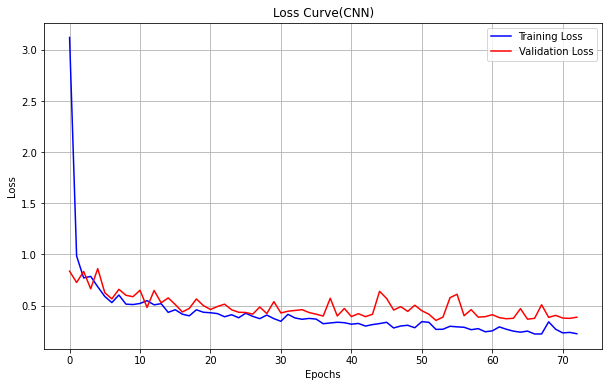

In [6]:
# Plot the training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Loss Curve(CNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(dir_output, 'training and validation loss curves.png'))
plt.show()



# Predict for the test set data and compare the true value with the predicted value

## Model Prediction:
- The trained model is loaded from the saved file and used to predict the test set (`X_test`).
- The prediction (`y_pred`) is compared with the actual test labels (`y_test`).

## Evaluation Metrics:
- **R² Score (r2)**: Measures the proportion of variance in the true values that is predictable from the model.
- **Mean Absolute Error (MAE)**: Represents the average magnitude of the errors between the predicted and true values.
- **Mean Squared Error (MSE)**: Indicates the average squared difference between the predicted and true values.

## Model Evaluation:
- The following metrics are computed and printed:
  - `r2`: R² score
  - `mse`: Mean Squared Error
  - `mae`: Mean Absolute Error

## Logging:
- The results of the evaluation (R², MSE, and MAE) are logged in the `training_log.txt` file for further analysis.


In [7]:
# Predict test set
model = tf.keras.models.load_model(os.path.join(dir_output, 'best_model.h5'))
y_pred = model.predict(X_test)
# Evaluate on the test set
#test_loss, test_mae = model.evaluate(X_test, y_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
#print R2、MSE、MAE
print(f'Test R2 Score: {r2}')
print(f'Test Loss: {mse}')
print(f'Test MAE: {mae}')
logging.info(f"Test MSE: {mse:.6f}")
logging.info(f"Test R² Score: {r2:.6f}")
logging.info(f"Test MAE Score: {mae:.6f}")

16/16 [==============================] - 0s 6ms/step


Test MSE: 0.405739
Test R² Score: 0.952402
Test MAE Score: 0.456801


Test R2 Score: 0.9524020577113006
Test Loss: 0.4057390214401335
Test MAE: 0.45680116980966895


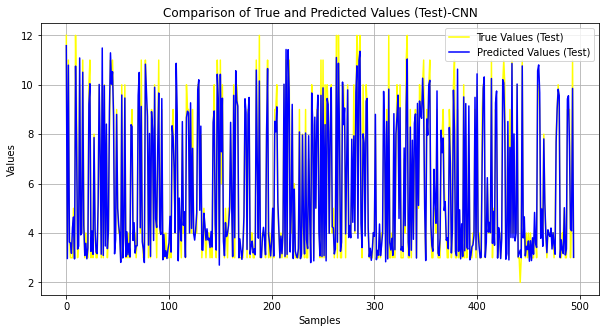

In [8]:
# Draw a comparison chart of the predicted results and the actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test,label='True Values (Test)', color='yellow', linewidth=1.5)
plt.plot(y_pred, label='Predicted Values (Test)', color='blue', linewidth=1.5)
plt.xlabel('Samples')
plt.ylabel('Values')
plt.title('Comparison of True and Predicted Values (Test)-CNN')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(dir_output, 'true_vs_predicted_classification.png'))
plt.show()

